In [38]:
import collections
import pickle
import torch
from tqdm import tqdm
import wandb

api = wandb.Api()

runs = api.runs("pmin/train_fmri_convex.py", 
                {"$and": 
                 [
                     {"config.dataset": "mt2"},
                     {"config.aggregator": "downsample"},
                     {"config.pca": 500},
                     {"state": "finished"},
                     {"config.features": {"$in": ["gaborpyramid3d", 'gaborpyramid3d_motionless']}},
                ]
                }
               )

archives = {}

print("Found %i" % len(runs))
for run in tqdm(runs):
    if run.config['features'] == 'SlowFast':
        if run.config['layer'] > 16:
            run.config['features'] = 'SlowFast_Fast'
            run.config['layer'] = run.config['layer'] - 17
        else:
            run.config['features'] = 'SlowFast_Slow'
    
    unique_name = f"{run.config['features']}_layer{int(run.config['layer']):02}_{run.config['dataset']}_{int(run.config['subset'])}"
    if unique_name in archives:
        continue
        
    #print(unique_name)
    #for file in run.files():
    #    if file.name == 'results.pkl':
    #        file.download(replace=True)
            
    #with open('results.pkl', 'rb') as f:
    #    results = pickle.load(f)
    if 'corrs_report' in run.summary:
        archives[unique_name] = {'config': run.config,
                                 'corrs_report': run.summary['corrs_report'],
                                 'r2_cvs': run.summary['r2_cvs']}

  0%|          | 0/88 [00:00<?, ?it/s]

Found 88


100%|██████████| 88/88 [00:00<00:00, 348.48it/s]


In [30]:
len(rows)

25

Text(0, 0.5, 'gaborpyramid3d_motionless')

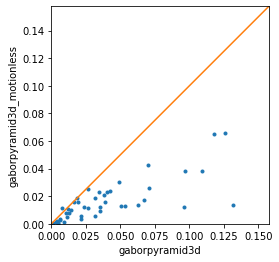

In [39]:
import numpy as np
import pandas as pd

rows = []
for i in archives.values():
    rows.append({'corrs_report': i['corrs_report'], 
                 'r2_cv': np.max(i['r2_cvs']), 
                 'subset': int(i['config']['subset']), 
                               'features': i['config']['features']})
    
df = pd.DataFrame(rows)
diffs = df.pivot('subset', 'features', 'r2_cv')

import matplotlib.pyplot as plt
plt.plot(diffs.iloc[:, 0], diffs.iloc[:, 1], '.')
plt.plot([0, 1], [0, 1])
plt.axis('square')
plt.xlim((0, diffs.max().max() * 1.2))
plt.ylim((0, diffs.max().max() * 1.2))
plt.xlabel(diffs.columns[0])
plt.ylabel(diffs.columns[1])


In [12]:
df

,corrs_report,r2_cv,subset,features
0,0.118885,0.012208,9,gaborpyramid3d_motionless
1,0.394379,0.065923,8,gaborpyramid3d_motionless
2,0.176660,0.011824,7,gaborpyramid3d_motionless
3,0.100751,0.001565,6,gaborpyramid3d_motionless
4,0.183429,0.013643,5,gaborpyramid3d_motionless
5,0.189276,0.009682,4,gaborpyramid3d_motionless
6,0.119218,0.010996,3,gaborpyramid3d_motionless
7,0.099041,0.003448,2,gaborpyramid3d_motionless
8,0.144253,0.012717,1,gaborpyramid3d_motionless
9,0.187699,0.008187,0,gaborpyramid3d_motionless


Text(0, 0.5, 'gaborpyramid3d_motionless')

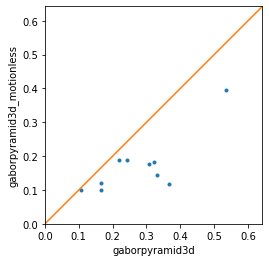